## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Absolute path to read the CSV file with a specified encoding**

In [2]:
# Absolute path to read the CSV file with a specified encoding
csv_path = r"C:\Users\Dell\Desktop\suma projects\Python_Diwali_Sales_Analysis\Diwali sales Data.csv"
df = pd.read_csv(csv_path, encoding='ISO-8859-1')

__Reading the first five columns of the dataset__

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


__From the above we, could see the attributes status and unnamed1 are empty and doesnt have any values,so we can drop them__

In [6]:
columns_to_drop = ['Status','unnamed1']

In [7]:
df = df.drop(columns=columns_to_drop)

In [8]:
df.info()  # confirms the columns are dropped#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


**Statistical information of the data**

In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**A quick summary:-The dataset contains 11,251 records and the age of users ranges from 12 to 92, with an average age of 35.42.Users placed an average of 2.49 orders, with a minimum of 1 and a maximum of 4.The transaction amount varies, with an average of 9453.61. The minimum transaction amount is 188, and the maximum is 23,952**


In [10]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

**This confirms there are null values in the amount column**


**As Amount column is numerical,so filled with mean value and  as the amount is in float data type, converting it to integer type**

In [11]:
mean_amount = df['Amount'].mean()

In [12]:
df['Amount'] = df['Amount'].fillna(mean_amount)

In [13]:
df['Amount'] = df['Amount'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age Group         11251 non-null  object
 5   Age               11251 non-null  int64 
 6   Marital_Status    11251 non-null  int64 
 7   State             11251 non-null  object
 8   Zone              11251 non-null  object
 9   Occupation        11251 non-null  object
 10  Product_Category  11251 non-null  object
 11  Orders            11251 non-null  int64 
 12  Amount            11251 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.1+ MB


# Exploratory Data Analysis #

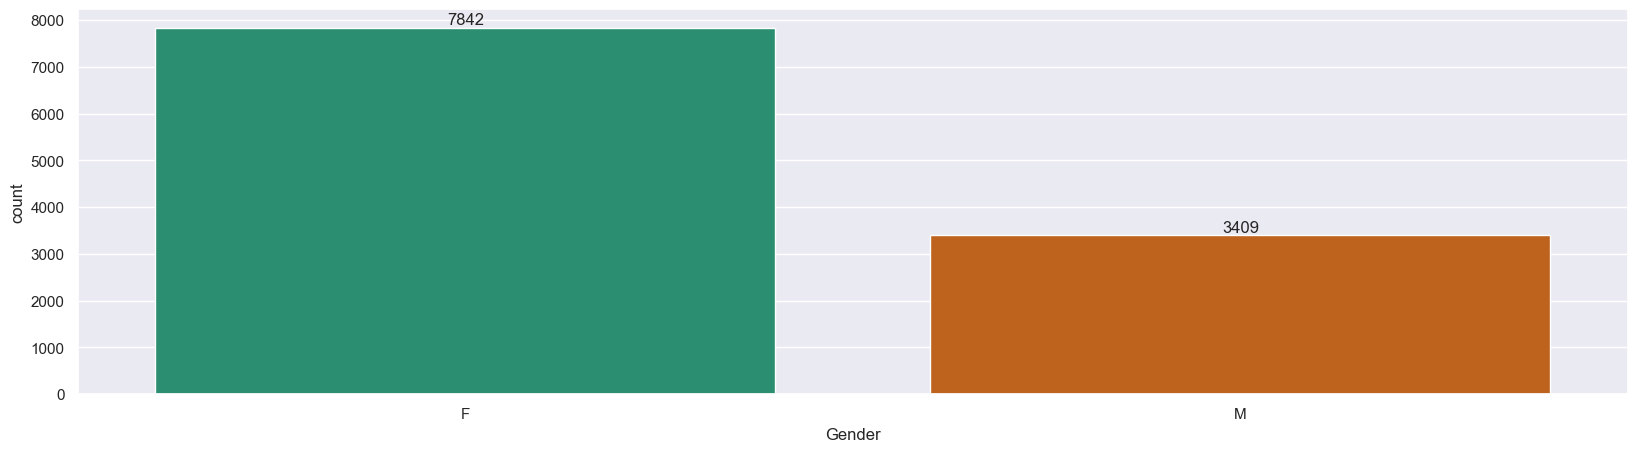

In [58]:
ax = sns.countplot(x='Gender', data=df, palette='Dark2', hue='Gender', legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

**Distribution of 'Age Group' with bars grouped by 'Gender**

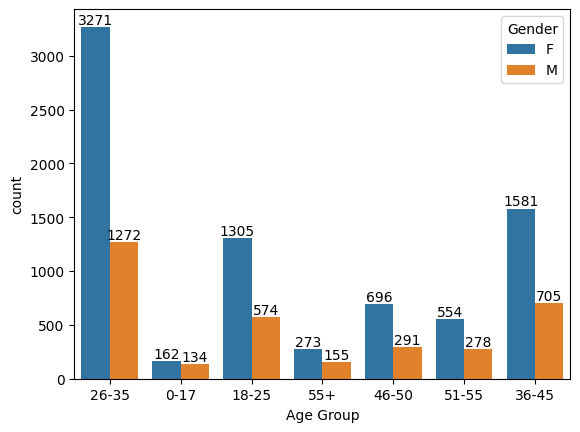

In [23]:
ax = sns.countplot(data= df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

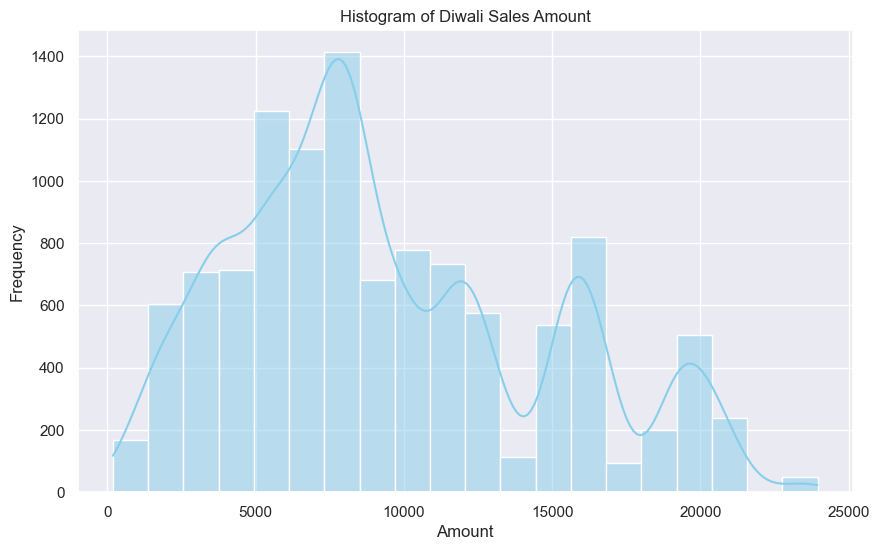

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Diwali Sales Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


**Total Amount vs Age Group**


<Axes: xlabel='Age Group', ylabel='Amount'>

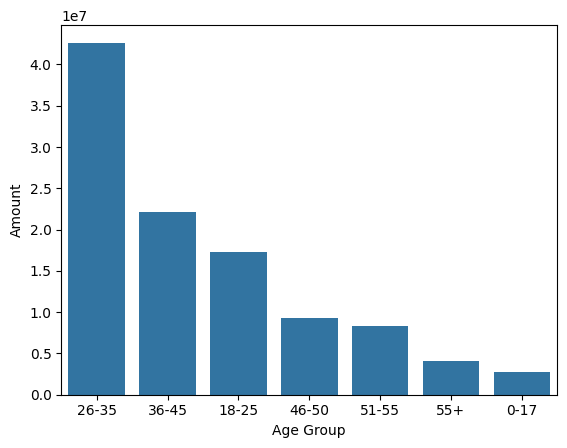

In [29]:
sales_age = df.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age)



**We can see that most of the buyers are of age group between 26-35 years old females**

**Gender vs Total Amount**

<Axes: xlabel='Gender', ylabel='Amount'>

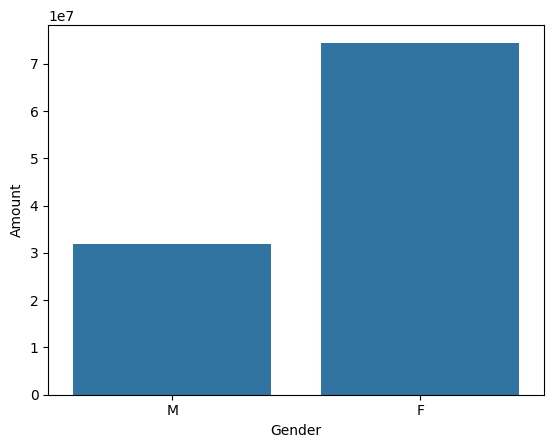

In [30]:
sns.barplot(x='Gender', y='Amount', data=df.groupby('Gender')['Amount'].sum().reset_index().sort_values(by='Amount'))


**Total Number of Orders from Top 10 States**


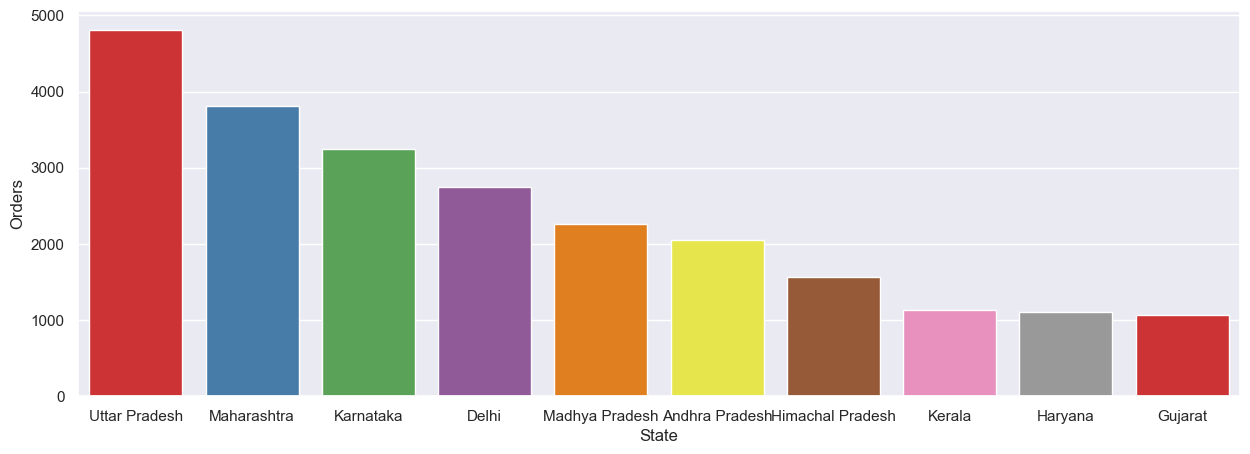

In [60]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

top_10_states = sales_state.head(10)

sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(x='State', y='Orders', hue='State',data=top_10_states, palette='Set1')
plt.show()


**Total Amount/Sales from Top 10 States**


<Axes: xlabel='State', ylabel='Amount'>

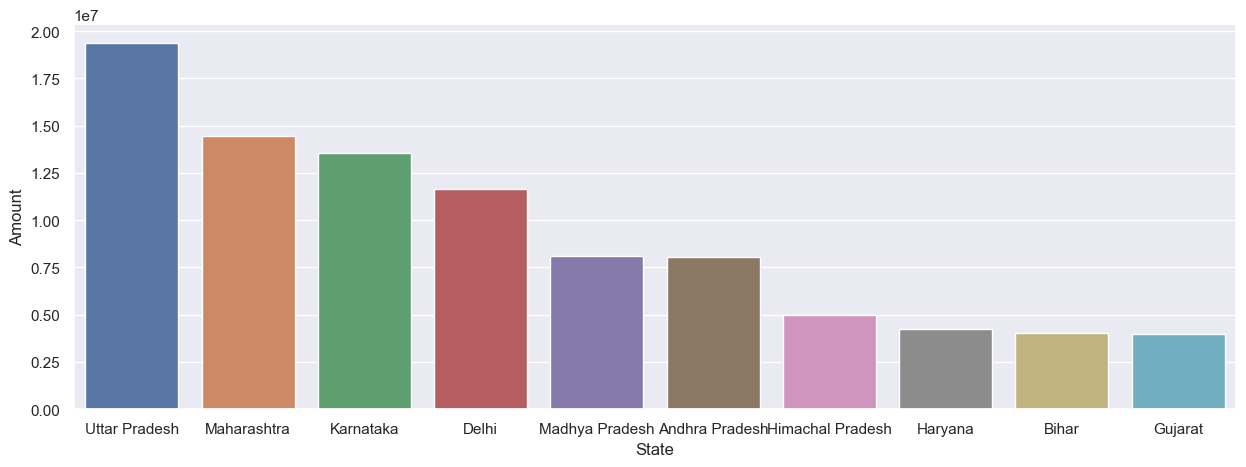

In [61]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
top_10_states = sales_state.head(10)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=top_10_states, x='State', y='Amount',hue='State',palette='deep')

**This confirms most of orders & total sales/amount are Uttar Pradesh, Maharashtra and Karnataka etc.**



**Marital status**')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

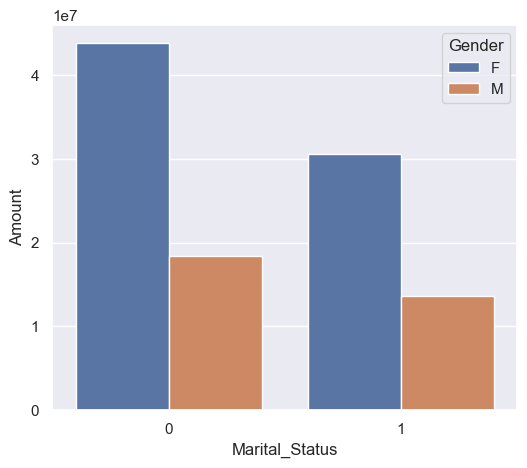

In [44]:
sales_state= df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize': (6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

**This proves that most of the buyers are married (women)**


__occupation__

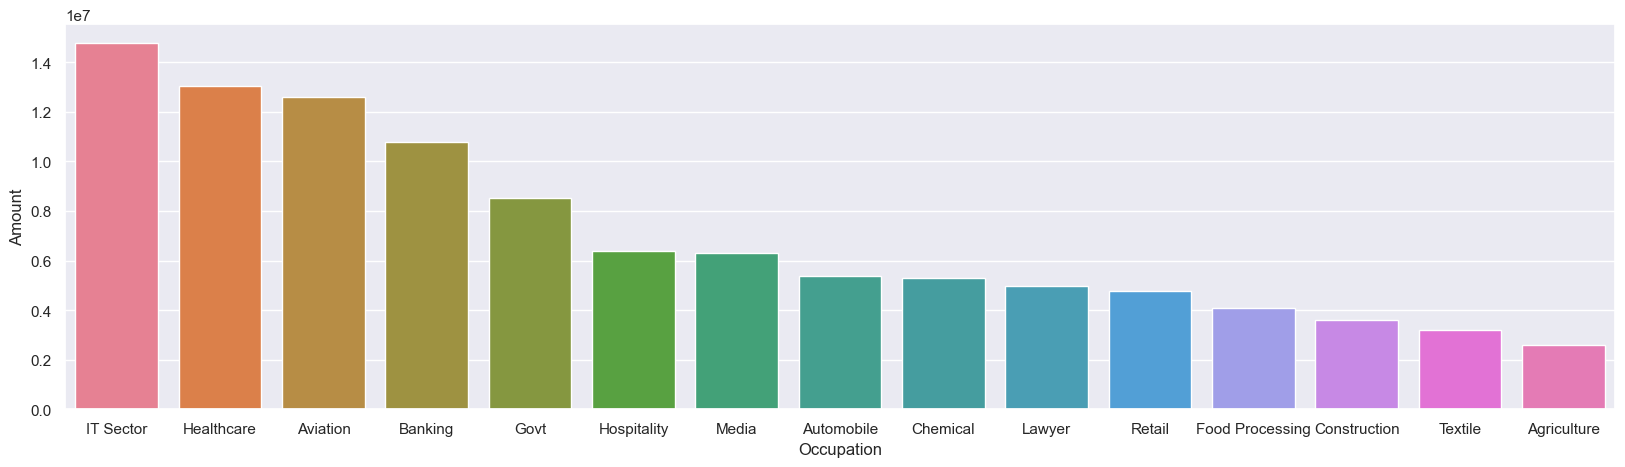

In [52]:
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False),
            x='Occupation', y='Amount', hue='Occupation', legend=False)
plt.show()

**This proves that the IT sector,Health care,Aviation and banking are topping in the buyers chart**

**Product_category**

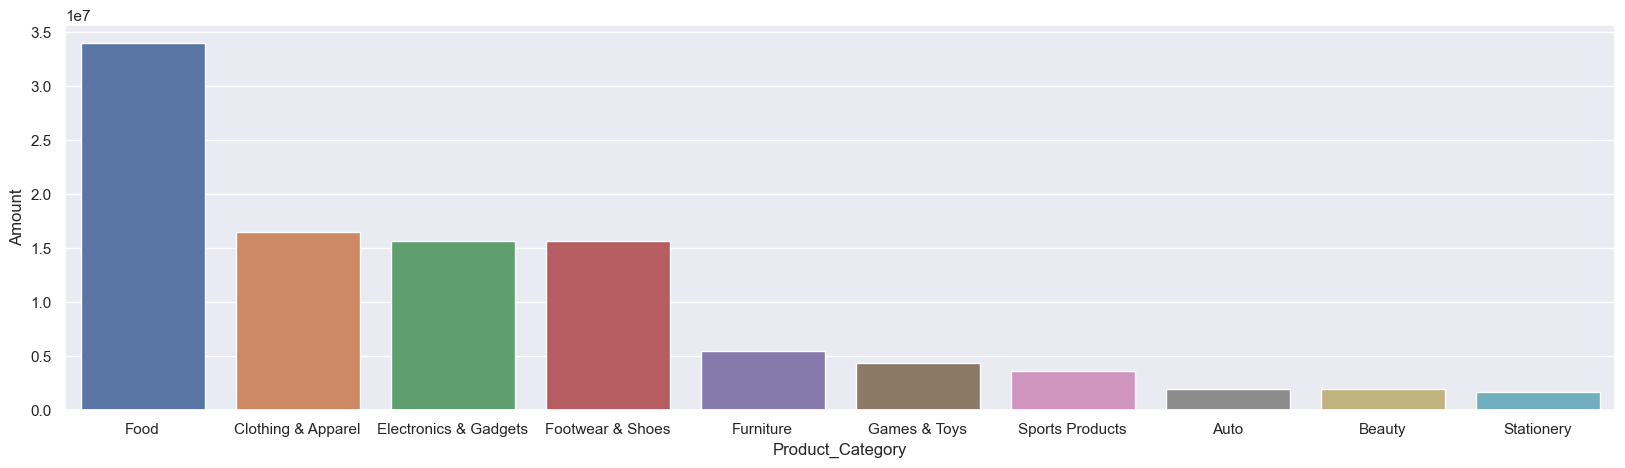

In [56]:
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(x='Product_Category', y='Amount', hue='Product_Category',
            data=df.groupby('Product_Category')['Amount'].sum().reset_index().nlargest(10, 'Amount'))
plt.show()


**This shows that the most of the sold products are from food, clothing and Electronics Category**



## Conclusion

**Married women of age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category**

